In [829]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [830]:
df = pd.read_csv('C:/Users/bhawna tiwari/Desktop/datascience/AI/student_depression_dataset.csv')
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [832]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [833]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27896    False
27897    False
27898    False
27899    False
27900    False
Length: 27901, dtype: bool

In [834]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [835]:
GenderNonDep = df[df['Depression'] == 0][['Gender','Depression']].groupby('Gender').count()
GenderNonDep

,Depression
Gender,
Female,5133
Male,6432


In [836]:
df[['Gender','Depression']].groupby('Gender').count()

,Depression
Gender,
Female,12354
Male,15547


In [837]:
categories = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
df[categories].describe()
df['Degree'].unique()

array(['B.Pharm', 'BSc', 'BA', 'BCA', 'M.Tech', 'PhD', "'Class 12'",
       'B.Ed', 'LLB', 'BE', 'M.Ed', 'MSc', 'BHM', 'M.Pharm', 'MCA', 'MA',
       'B.Com', 'MD', 'MBA', 'MBBS', 'M.Com', 'B.Arch', 'LLM', 'B.Tech',
       'BBA', 'ME', 'MHM', 'Others'], dtype=object)

In [838]:
categories = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
df[categories].describe()
df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [839]:
df['City'].unique()

array(['Visakhapatnam', 'Bangalore', 'Srinagar', 'Varanasi', 'Jaipur',
       'Pune', 'Thane', 'Chennai', 'Nagpur', 'Nashik', 'Vadodara',
       'Kalyan', 'Rajkot', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Lucknow',
       'Indore', 'Surat', 'Ludhiana', 'Bhopal', 'Meerut', 'Agra',
       'Ghaziabad', 'Hyderabad', 'Vasai-Virar', 'Kanpur', 'Patna',
       'Faridabad', 'Delhi', 'Saanvi', 'M.Tech', 'Bhavna', "'Less Delhi'",
       'City', '3.0', "'Less than 5 Kalyan'", 'Mira', 'Harsha', 'Vaanya',
       'Gaurav', 'Harsh', 'Reyansh', 'Kibara', 'Rashi', 'ME', 'M.Com',
       'Nalyan', 'Mihir', 'Nalini', 'Nandini', 'Khaziabad'], dtype=object)

In [840]:
df = pd.get_dummies(df, columns=['Work Pressure'], drop_first=True)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work Pressure_2.0,Work Pressure_5.0
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1,False,False
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0,False,False
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0,False,False
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1,False,False
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0,False,False


In [841]:
df = pd.get_dummies(df, columns=['Job Satisfaction'], drop_first=True)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,...,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Work Pressure_2.0,Work Pressure_5.0,Job Satisfaction_1.0,Job Satisfaction_2.0,Job Satisfaction_3.0,Job Satisfaction_4.0
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,...,3.0,1.0,No,1,False,False,False,False,False,False
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,'5-6 hours',Moderate,...,3.0,2.0,Yes,0,False,False,False,False,False,False
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,'Less than 5 hours',Healthy,...,9.0,1.0,Yes,0,False,False,False,False,False,False
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,...,4.0,5.0,Yes,1,False,False,False,False,False,False
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,'5-6 hours',Moderate,...,1.0,1.0,No,0,False,False,False,False,False,False


In [842]:
columns_to_delete = ['Work Pressure_2.0', 'Work Pressure_5.0', 'Job Satisfaction_1.0', 'Job Satisfaction_2.0', 'Job Satisfaction_3.0', 'Job Satisfaction_4.0']
df.drop(columns=columns_to_delete, inplace=True)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [843]:
df['Age'].unique()

array([33., 24., 31., 28., 25., 29., 30., 27., 19., 20., 23., 18., 21.,
       22., 34., 32., 26., 39., 35., 42., 36., 58., 49., 38., 51., 44.,
       43., 46., 59., 54., 48., 56., 37., 41.])

In [844]:
df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [845]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Study Satisfaction'] = label_encoder.fit_transform(df['Study Satisfaction'])

df['Academic Pressure'] = label_encoder.fit_transform(df['Academic Pressure'])

df['Dietary Habits'] = label_encoder.fit_transform(df['Dietary Habits'])

df['Degree'] = label_encoder.fit_transform(df['Degree'])

df['Work/Study Hours'] = label_encoder.fit_transform(df['Work/Study Hours'])

df['Financial Stress'] = label_encoder.fit_transform(df['Financial Stress'])

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df['Have you ever had suicidal thoughts ?'] = label_encoder.fit_transform(df['Have you ever had suicidal thoughts ?'])

df['Family History of Mental Illness'] = label_encoder.fit_transform(df['Family History of Mental Illness'])
df.head(15)

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,1,33.0,Visakhapatnam,Student,5,8.97,2,'5-6 hours',0,4,1,3,0,0,1
1,8,0,24.0,Bangalore,Student,2,5.90,5,'5-6 hours',1,11,0,3,1,1,0
2,26,1,31.0,Srinagar,Student,3,7.03,5,'Less than 5 hours',0,6,0,9,0,1,0
3,30,0,28.0,Varanasi,Student,3,5.59,2,'7-8 hours',1,8,1,4,4,1,1
4,32,0,25.0,Jaipur,Student,4,8.13,3,'5-6 hours',1,17,1,1,0,0,0
5,33,1,29.0,Pune,Student,2,5.70,3,'Less than 5 hours',0,27,0,4,0,0,0
6,52,1,30.0,Thane,Student,3,9.54,4,'7-8 hours',0,11,0,1,1,0,0
7,56,0,30.0,Chennai,Student,2,8.04,4,'Less than 5 hours',3,0,0,0,0,1,0
8,59,1,28.0,Nagpur,Student,3,9.79,1,'7-8 hours',1,3,1,12,2,0,1
9,62,1,31.0,Nashik,Student,2,8.38,3,'Less than 5 hours',1,12,1,2,4,0,1


In [846]:
df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [847]:
from sklearn.preprocessing import OrdinalEncoder

orModel = OrdinalEncoder(categories=[
    ["'Less than 5 hours'", "'5-6 hours'", "'7-8 hours'", "'More than 8 hours'", 'Others']])
df['Sleep Duration En'] = orModel.fit_transform(df[['Sleep Duration']])

In [848]:
df = pd.get_dummies(df, columns=['Sleep Duration'], drop_first=True)
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration En,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others
0,2,1,33.0,Visakhapatnam,Student,5,8.97,2,0,4,1,3,0,0,1,1.0,False,False,False,False
1,8,0,24.0,Bangalore,Student,2,5.90,5,1,11,0,3,1,1,0,1.0,False,False,False,False
2,26,1,31.0,Srinagar,Student,3,7.03,5,0,6,0,9,0,1,0,0.0,False,True,False,False
3,30,0,28.0,Varanasi,Student,3,5.59,2,1,8,1,4,4,1,1,2.0,True,False,False,False
4,32,0,25.0,Jaipur,Student,4,8.13,3,1,17,1,1,0,0,0,1.0,False,False,False,False


In [849]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration En,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others
0,2,1,33.0,Visakhapatnam,Student,5,8.97,2,0,4,1,3,0,0,1,1.0,False,False,False,False
1,8,0,24.0,Bangalore,Student,2,5.90,5,1,11,0,3,1,1,0,1.0,False,False,False,False
2,26,1,31.0,Srinagar,Student,3,7.03,5,0,6,0,9,0,1,0,0.0,False,True,False,False
3,30,0,28.0,Varanasi,Student,3,5.59,2,1,8,1,4,4,1,1,2.0,True,False,False,False
4,32,0,25.0,Jaipur,Student,4,8.13,3,1,17,1,1,0,0,0,1.0,False,False,False,False


In [850]:
df.rename(columns={
    "Sleep Duration En": "Sleep Duration",
    "another_old_column": "new_column_name"
}, inplace=True)

In [851]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others
0,2,1,33.0,Visakhapatnam,Student,5,8.97,2,0,4,1,3,0,0,1,1.0,False,False,False,False
1,8,0,24.0,Bangalore,Student,2,5.90,5,1,11,0,3,1,1,0,1.0,False,False,False,False
2,26,1,31.0,Srinagar,Student,3,7.03,5,0,6,0,9,0,1,0,0.0,False,True,False,False
3,30,0,28.0,Varanasi,Student,3,5.59,2,1,8,1,4,4,1,1,2.0,True,False,False,False
4,32,0,25.0,Jaipur,Student,4,8.13,3,1,17,1,1,0,0,0,1.0,False,False,False,False


In [852]:
df['Dietary Habits'].unique()

array([0, 1, 3, 2])

In [853]:
df['Family History of Mental Illness'].unique()

array([0, 1])

In [854]:
df['Age'].unique()

array([33., 24., 31., 28., 25., 29., 30., 27., 19., 20., 23., 18., 21.,
       22., 34., 32., 26., 39., 35., 42., 36., 58., 49., 38., 51., 44.,
       43., 46., 59., 54., 48., 56., 37., 41.])

In [855]:
df['Gender'].unique()

array([1, 0])

In [856]:
df['Degree'].unique()

array([ 4, 11,  6,  8, 17, 27,  0,  3, 12,  9, 15, 25, 10, 16, 21, 18,  2,
       22, 19, 20, 14,  1, 13,  5,  7, 23, 24, 26])

In [857]:
df['Academic Pressure'].unique()

array([5, 2, 3, 4, 1, 0])

In [858]:
df['Financial Stress'].unique()

array([0, 1, 4, 2, 3, 5])

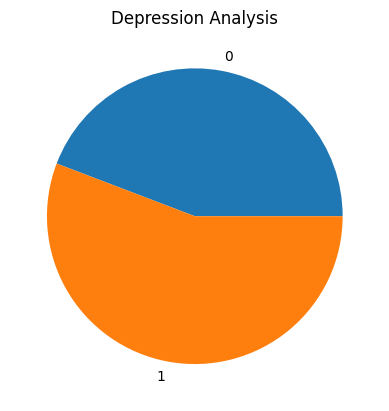

In [859]:
GenderDep = df[['Gender','Depression']].groupby('Gender').sum()
plt.pie(GenderDep['Depression'],labels=GenderDep.index)
plt.title('Depression Analysis')
plt.grid(True)
plt.show()

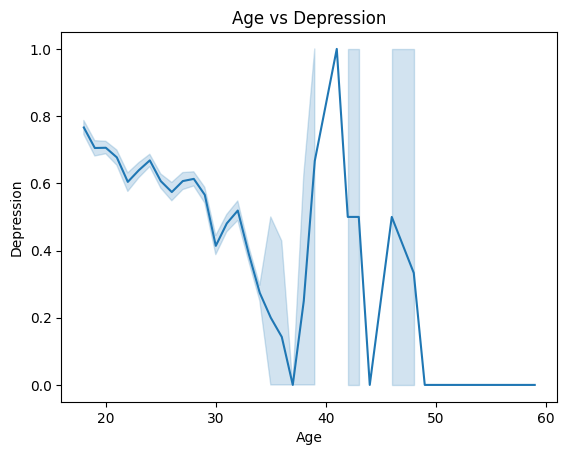

In [860]:
sns.lineplot(df,x='Age', y='Depression')
plt.title('Age vs Depression')
plt.xlabel('Age')
plt.ylabel('Depression')
plt.show()

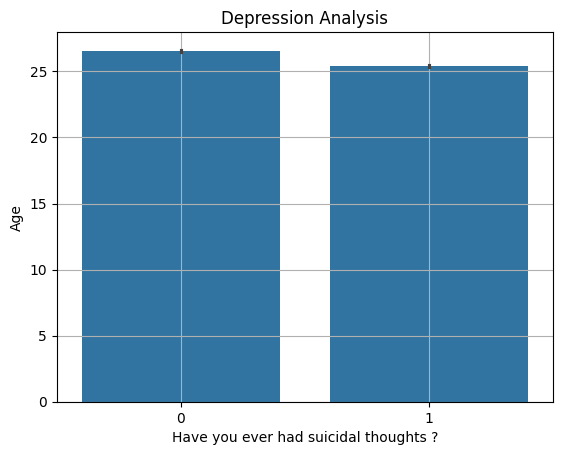

In [861]:
sns.barplot(df,x='Have you ever had suicidal thoughts ?', y='Age')
plt.title('Depression Analysis')
plt.ylabel('Age')
plt.xlabel('Have you ever had suicidal thoughts ?')
plt.grid(True)
plt.show()

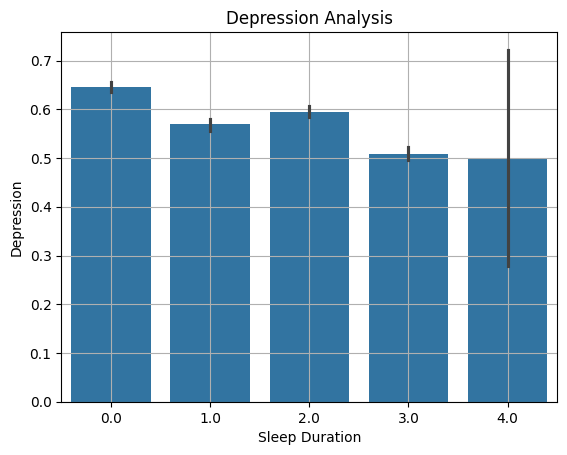

In [862]:
sns.barplot(df,x='Sleep Duration', y='Depression')
plt.title('Depression Analysis')
plt.ylabel('Depression')
plt.xlabel('Sleep Duration')
plt.grid(True)
plt.show()

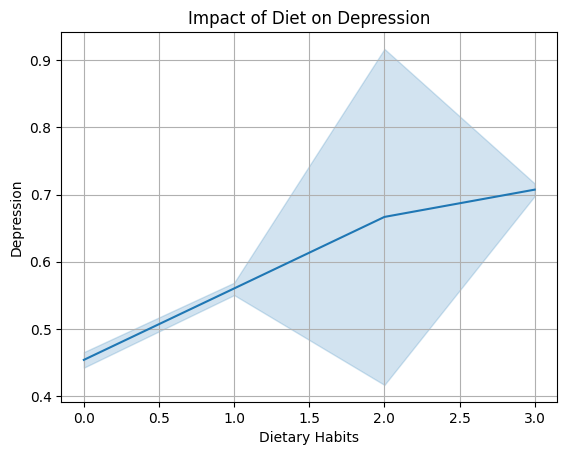

In [863]:
sns.lineplot(df,x='Dietary Habits', y='Depression')
plt.title('Impact of Diet on Depression')
plt.xlabel('Dietary Habits')
plt.ylabel('Depression')
plt.grid()
plt.show()

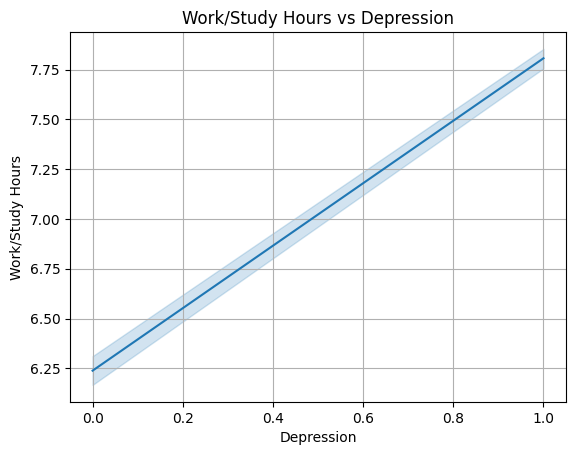

In [864]:
sns.lineplot(x='Depression', y='Work/Study Hours', data=df)
plt.title('Work/Study Hours vs Depression')
plt.grid()
plt.show()

In [865]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,CGPA,Study Satisfaction,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep Duration,Sleep Duration_'7-8 hours',Sleep Duration_'Less than 5 hours',Sleep Duration_'More than 8 hours',Sleep Duration_Others
0,2,1,33.0,Visakhapatnam,Student,5,8.97,2,0,4,1,3,0,0,1,1.0,False,False,False,False
1,8,0,24.0,Bangalore,Student,2,5.90,5,1,11,0,3,1,1,0,1.0,False,False,False,False
2,26,1,31.0,Srinagar,Student,3,7.03,5,0,6,0,9,0,1,0,0.0,False,True,False,False
3,30,0,28.0,Varanasi,Student,3,5.59,2,1,8,1,4,4,1,1,2.0,True,False,False,False
4,32,0,25.0,Jaipur,Student,4,8.13,3,1,17,1,1,0,0,0,1.0,False,False,False,False


In [866]:
X1 = df[['CGPA','Sleep Duration','Dietary Habits','Degree','Work/Study Hours','Financial Stress']]
X1

,CGPA,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress
0,8.97,1.0,0,4,3,0
1,5.90,1.0,1,11,3,1
2,7.03,0.0,0,6,9,0
3,5.59,2.0,1,8,4,4
4,8.13,1.0,1,17,1,0
...,...,...,...,...,...,...
27896,5.75,1.0,3,0,7,0
27897,9.40,0.0,0,25,0,2
27898,6.61,1.0,3,22,12,1
27899,6.88,0.0,0,0,10,4


In [867]:
y1 = df['Depression']

In [868]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X1, y1, train_size=0.8, random_state=2)

In [869]:
model = LogisticRegression()
model

LogisticRegression()

In [870]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [871]:
ypredict = model.predict(xtest)

In [872]:
accuracy_score(ytest,ypredict)

0.7142089231320552

In [873]:
X1

,CGPA,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress
0,8.97,1.0,0,4,3,0
1,5.90,1.0,1,11,3,1
2,7.03,0.0,0,6,9,0
3,5.59,2.0,1,8,4,4
4,8.13,1.0,1,17,1,0
...,...,...,...,...,...,...
27896,5.75,1.0,3,0,7,0
27897,9.40,0.0,0,25,0,2
27898,6.61,1.0,3,22,12,1
27899,6.88,0.0,0,0,10,4


In [874]:
model.predict([[8.97,1.0,0,4,3,0]])

c:\Users\bhawna tiwari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [875]:
df['Sleep Duration'].unique()

array([1., 0., 2., 3., 4.])

In [876]:
X2 = df[['CGPA','Sleep Duration','Dietary Habits','Degree','Work/Study Hours','Financial Stress']]
X2

,CGPA,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress
0,8.97,1.0,0,4,3,0
1,5.90,1.0,1,11,3,1
2,7.03,0.0,0,6,9,0
3,5.59,2.0,1,8,4,4
4,8.13,1.0,1,17,1,0
...,...,...,...,...,...,...
27896,5.75,1.0,3,0,7,0
27897,9.40,0.0,0,25,0,2
27898,6.61,1.0,3,22,12,1
27899,6.88,0.0,0,0,10,4


In [877]:
y2 = df['Have you ever had suicidal thoughts ?']

In [878]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X1, y2, train_size=0.8, random_state=2 )

In [879]:
model = LogisticRegression()
model

LogisticRegression()

In [880]:
model.fit(xtrain,ytrain)

LogisticRegression()

In [881]:
ypredict = model.predict(xtest)

In [882]:
accuracy_score(ytest,ypredict)

0.6545421967389357

In [883]:
X1

,CGPA,Sleep Duration,Dietary Habits,Degree,Work/Study Hours,Financial Stress
0,8.97,1.0,0,4,3,0
1,5.90,1.0,1,11,3,1
2,7.03,0.0,0,6,9,0
3,5.59,2.0,1,8,4,4
4,8.13,1.0,1,17,1,0
...,...,...,...,...,...,...
27896,5.75,1.0,3,0,7,0
27897,9.40,0.0,0,25,0,2
27898,6.61,1.0,3,22,12,1
27899,6.88,0.0,0,0,10,4


In [884]:
model.predict([[8.97,1.0,0,4,3,0]])

c:\Users\bhawna tiwari\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [885]:
df2=pd.read_csv('C:\\Users\\bhawna tiwari\\Desktop\\datascience\\AI\\Student_Mental_Stress_and_Coping_Mechanisms.csv')
df2

,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,Female,2,9,2,12,2,1,1,3,5,9,No,1,Walking or Nature Walks,4,No,Yes,1
1,871-12-8572,25,Female,0,28,0,6,0,1,1,1,2,9,Yes,3,Meditation,2,Yes,No,1
2,495-13-2672,24,Female,0,45,3,12,10,3,3,1,4,9,Yes,5,Reading,1,Yes,Yes,3
3,365-77-2496,20,Male,2,8,7,7,4,1,3,2,5,1,No,1,Social Media Engagement,2,Yes,No,4
4,664-76-5622,28,Male,0,14,6,8,1,2,4,4,2,7,Yes,1,Exercise,1,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,826-89-7993,24,Genderfluid,2,50,4,11,8,5,2,4,5,2,Yes,1,Exercise,3,Yes,No,2
756,681-15-6754,23,Female,3,5,6,12,7,1,4,2,1,1,Yes,2,Meditation,4,Yes,No,1
757,714-33-5373,23,Male,1,17,3,11,5,2,4,3,3,9,Yes,5,Social Media Engagement,4,Yes,No,3
758,849-54-1252,29,Female,1,15,8,10,4,2,1,2,2,2,No,4,Meditation,4,No,Yes,3


In [886]:
df2['Gender'].unique()

array(['Female', 'Male', 'Agender', 'Bigender', 'Genderfluid',
       'Polygender', 'Non-binary', 'Genderqueer'], dtype=object)

In [887]:
df2['Relationship Stress'].unique()

array([5, 2, 4, 3, 1])

In [888]:
df2['Family Mental Health History'].unique()

array(['No', 'Yes'], dtype=object)

In [889]:
df2['Financial Stress'].unique()

array([1, 3, 4, 5, 2])

In [890]:
df2['Age'].unique()

array([22, 25, 24, 20, 28, 23, 19, 21, 18, 27, 30, 29, 26])

In [891]:
df2['Social Media Usage (Hours per day)'].unique()

array([2, 0, 3, 7, 6, 5, 1, 8, 4])

In [892]:
df2['Mental Stress Level'].unique()

array([ 9,  1,  7,  2, 10,  4,  8,  3,  6,  5])

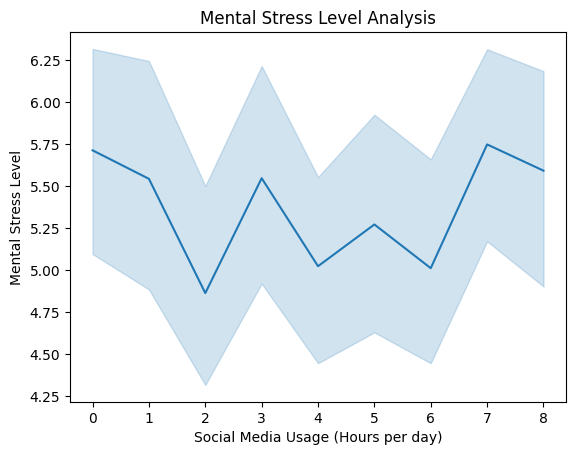

In [893]:
sns.lineplot(df2,x='Social Media Usage (Hours per day)', y='Mental Stress Level')
plt.title('Mental Stress Level Analysis')
plt.ylabel('Mental Stress Level')
plt.xlabel('Social Media Usage (Hours per day)')
# plt.grid(True)
plt.show()

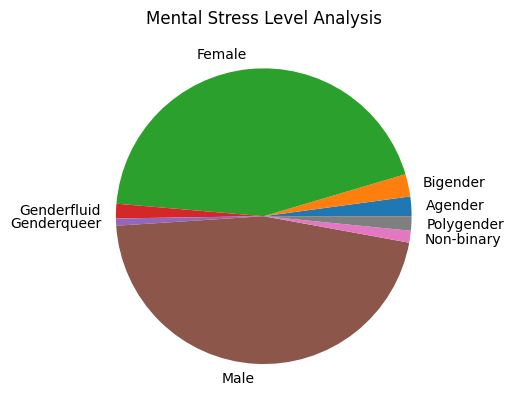

In [894]:
GenderDep = df2[['Gender','Mental Stress Level']].groupby('Gender').sum()
plt.pie(GenderDep['Mental Stress Level'],labels=GenderDep.index)
plt.title('Mental Stress Level Analysis')
plt.grid(True)
plt.show()

In [895]:
df2['Stress Coping Mechanisms'].unique()

array(['Walking or Nature Walks', 'Meditation', 'Reading',
       'Social Media Engagement', 'Exercise', 'Talking to Friends',
       'Yoga', 'Watching Sports', 'Spending Time Alone', 'Travelling'],
      dtype=object)

In [896]:
df2['Medical Condition'].unique()

array(['Yes', 'No'], dtype=object)

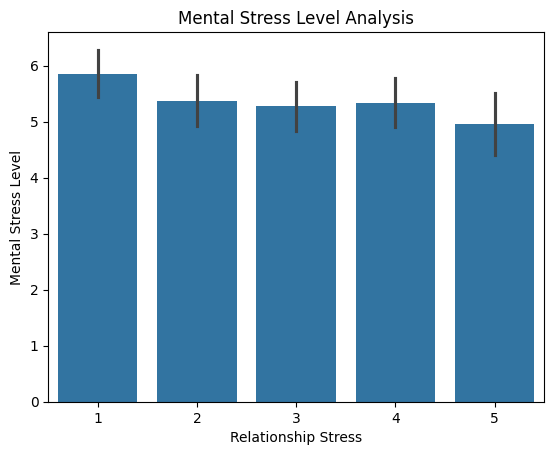

In [897]:
sns.barplot(df2,x='Relationship Stress', y='Mental Stress Level')
plt.title('Mental Stress Level Analysis')
plt.ylabel('Mental Stress Level')
plt.xlabel('Relationship Stress')
# plt.grid(True)
plt.show()

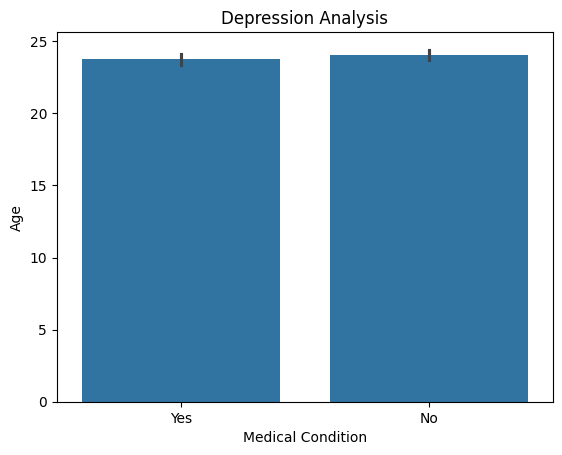

In [898]:
sns.barplot(df2,x='Medical Condition', y='Age')
plt.title('Depression Analysis')
plt.ylabel('Age')
plt.xlabel('Medical Condition')
# plt.grid(True)
plt.show()

In [899]:
df2['Substance Use'].unique()

array([1, 3, 4, 5, 2])

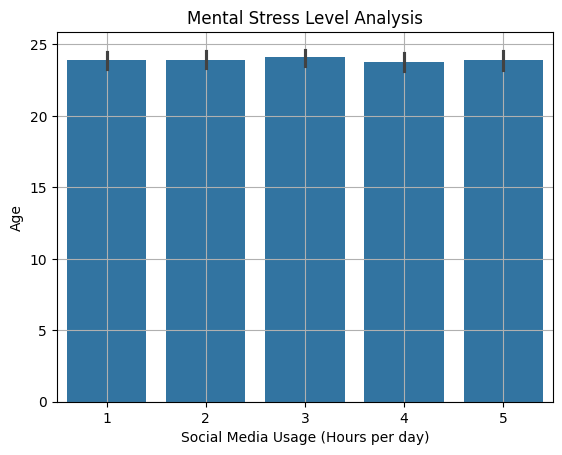

In [902]:
sns.barplot(df2,x='Substance Use', y='Age')
plt.title('Mental Stress Level Analysis')
plt.ylabel('Age')
plt.xlabel('Social Media Usage (Hours per day)')
plt.grid(True)
plt.show() 